# Floodwater Depth Estimation Tool (FwDET) version 2.1
Program procedure:
 1. Flood extent polygon to polyline
 2. Polyline to Raster - DEM extent and resolution (Env)
 3. Con - DEM values to Raster
 4. Euclidean Allocation - assign boundary cell elevation to nearest domain cells
 5. Calculate water depth by deducting DEM by Euclidean Allocation
 6. Run low-pass Filter
 
Created by Sagy Cohen, Surface Dynamics Modeling Lab, University of Alabama
email: sagy.cohen@ua.edu; web: http://sdml.ua.edu

## Set input and output variables 

In [1]:
# use kernel arcgispro-py3 (python 3.9.16)
import arcpy

In [2]:
arcpy.env.overwriteOutput = True
infolder = 'C:/Users/Lyn/Documents/Programming/Python_codes/fwdet/Forecast_test_5day/'

# make a geodatabase    
gdb_path = infolder 
# Create the geodatabase
arcpy.CreateFileGDB_management(out_folder_path = infolder, out_name='geodatabase.gdb')
#workspace
ws = arcpy.env.workspace = infolder

dem_name = infolder+'Houston_DEM.tif'
inund_polygon = infolder+'clipped_extent.shp'
#clip_dem = '' #[Optional] - If empty, the clip_dem will be calculated with the Clip_management function
#cost_raster ='' #[Optional] - If empty, the CostRaster will be calculated below
WaterDepthOutput = 'WaterDepth_i10_s0p5'
iterations = 10
SlopeFiltering = True
SlopeThreshold = 0.5
#WaterDepthOutput = 'WaterDepth_i{0}_s{1}'.format(iterations,SlopeThreshold)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found

## Housekeeping

In [3]:
dem = arcpy.Raster(dem_name)
cell_size = dem.meanCellHeight
# Proper string representation of dem extent to be accepted by Clip_management method
extent = '{} {} {} {}'.format(dem.extent.XMin, dem.extent.YMin, dem.extent.XMax, dem.extent.YMax)

# Dont run these if cost_raster and clip_dem are already defined above
cost_raster = (((dem <= 0)*999)+1)
cost_raster.save('CostRaster.tif')

clip_dem = 'ClipDEM'
arcpy.management.Clip(dem, extent, clip_dem, inund_polygon, nodata_value= "-9999", clipping_geometry="ClippingGeometry", maintain_clipping_extent="NO_MAINTAIN_EXTENT")
clip_dem_ras = arcpy.Raster(clip_dem)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found

## Calculate boundary raster 

In [4]:

#print('Focal iteration '+str(i+1))
arcpy.env.overwriteOutput = True
polyline = infolder + '/polyline.shp'
arcpy.PolygonToLine_management(inund_polygon, polyline)
# Convert polyline to raster
with arcpy.EnvManager(snapRaster=clip_dem_ras):
    arcpy.conversion.PolylineToRaster(polyline, 'FID', 'linerast15', "MAXIMUM_LENGTH", "NONE", cell_size)
raster_polyline = arcpy.Raster('linerast15')
raster_polyline.save("rstr_poly")
# The input whose values will be used as the output cell values if the condition is false.
inFalseConstant = '#'
where_clause = 'VALUE >= 0'
#Extract the boundary cells elevation from DEM
boundary = arcpy.sa.Con(raster_polyline, dem, inFalseConstant, where_clause)
# boundary.save('boundary1')
#Smooth boundary raster
for i in range(iterations):
    OutRasTemp = arcpy.sa.FocalStatistics(boundary, "Rectangle 5 5 CELL", 'MEAN', 'DATA')
    boundary = arcpy.sa.Con(raster_polyline, OutRasTemp, inFalseConstant, where_clause)
    boundary.save('boundary'+str(i+1))
#Identify and remove ocean boundary cells
OutRasTemp = arcpy.sa.FocalStatistics(dem, 'Circle 2 CELL', 'MINIMUM', 'DATA') 
whereClause2 = 'VALUE > 0'
boundary = arcpy.sa.Con(OutRasTemp, boundary, inFalseConstant, whereClause2)
#boundary.save("boundaryAfterOcean")
if SlopeFiltering:
#calculate topo slope
    print('Calculating Slope')
    extent_clip = '{} {} {} {}'.format(boundary.extent.XMin, boundary.extent.YMin, boundary.extent.XMax, boundary.extent.YMax)
    with arcpy.EnvManager(extent=extent_clip):
        out_slope = arcpy.sa.Slope(dem, "PERCENT_RISE", 1, "GEODESIC", "METER")
        out_slope.save("Slope_m")
#Remove erroneous boundary cells 
    whereClause_slope = 'VALUE > ' + str(SlopeThreshold)
    boundary = arcpy.sa.Con(out_slope, boundary, inFalseConstant, whereClause_slope)
boundary.save("boundFinal")
print('Finished calculating the boundary raster')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found

Calculating Slope



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found

Finished calculating the boundary raster


## Calculate the water depth raster

In [5]:
MULTIPLIER = 10000
boundary_int = arcpy.sa.Int(boundary * MULTIPLIER)
#boundary_int.save("boundary_int")
print('Running cost allocation')
with arcpy.EnvManager(snapRaster=None, extent="DEFAULT", mask=clip_dem):
    cost_alloc = arcpy.sa.CostAllocation(boundary_int, cost_raster, '#', '#', 'Value')

# Divide the result from the cost allocation function using the same constant used to create the integer
# representation of the boundary
cost_alloc = arcpy.sa.Float(cost_alloc) / MULTIPLIER
print('Cost Allocation raster generated')
print('Calculating estimated water depth')
water_depth = (cost_alloc - clip_dem_ras)
# Remove estimated water depths below 0 and change them to 0
water_depth = arcpy.sa.Con(water_depth > 0, water_depth,"#")
#water_depth.save(WaterDepthOutput)
#print('Floodwater depth computed')
#water_depth

Running cost allocation



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found

Cost Allocation raster generated
Calculating estimated water depth


## Calculate smooth water depth raster (low-pass filter)

Running low-pass Filter



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Lyn\AppData\Local\ESRI\conda\envs\arcgispro-p

AttributeError: _ARRAY_API not found

Finished low-pass Filter calculation


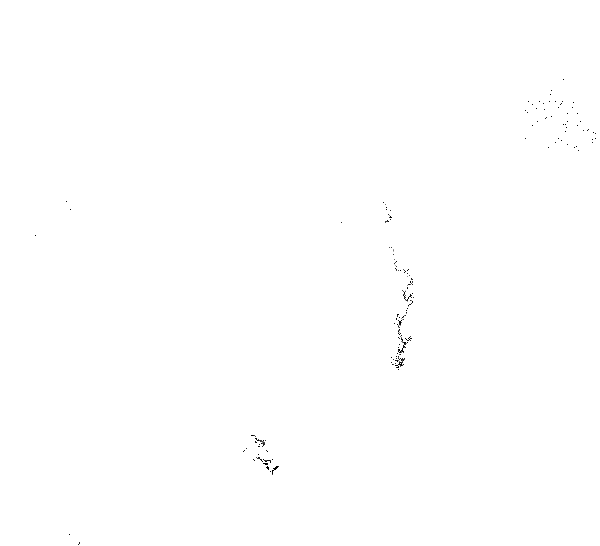

In [6]:
#Run a low-pass filter
print('Running low-pass Filter')
water_depth_filtered = arcpy.sa.Filter(water_depth, 'LOW', 'DATA')
waterDepthFilter2 = arcpy.sa.Con(clip_dem_ras, water_depth_filtered, '#', 'VALUE > 0')
#waterDepthFilter2.save(WaterDepthOutput+'_filtered')
print('Finished low-pass Filter calculation')
waterDepthFilter2

In [ ]:
%pip install rasterio

In [11]:
# Save the waterDepthFilter2 raster to a file
waterDepthFilter2.save(infolder+"waterdepth.tif")